In [1]:
# Importing necessary libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ratings = pd.read_csv("ml-latest-small/ratings.csv")
tags = pd.read_csv("ml-latest-small/tags.csv")
movies = pd.read_csv("ml-latest-small/movies.csv")
links = pd.read_csv("ml-latest-small/links.csv")

In [3]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'])
tags['timestamp'] = pd.to_datetime(tags['timestamp'])

In [4]:
print("Ratings Dataset:")
print(ratings.head())
print("\nTags Dataset:")
print(tags.head())
print("\nMovies Dataset:")
print(movies.head())
print("\nLinks Dataset:")
print(links.head())

Ratings Dataset:
   userId  movieId  rating                     timestamp
0       1        1     4.0 1970-01-01 00:00:00.964982703
1       1        3     4.0 1970-01-01 00:00:00.964981247
2       1        6     4.0 1970-01-01 00:00:00.964982224
3       1       47     5.0 1970-01-01 00:00:00.964983815
4       1       50     5.0 1970-01-01 00:00:00.964982931

Tags Dataset:
   userId  movieId              tag                     timestamp
0       2    60756            funny 1970-01-01 00:00:01.445714994
1       2    60756  Highly quotable 1970-01-01 00:00:01.445714996
2       2    60756     will ferrell 1970-01-01 00:00:01.445714992
3       2    89774     Boxing story 1970-01-01 00:00:01.445715207
4       2    89774              MMA 1970-01-01 00:00:01.445715200

Movies Dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4   

In [5]:
print(ratings.info())
print(tags.info())
print(movies.info())
print(links.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100836 non-null  int64         
 1   movieId    100836 non-null  int64         
 2   rating     100836 non-null  float64       
 3   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   userId     3683 non-null   int64         
 1   movieId    3683 non-null   int64         
 2   tag        3683 non-null   object        
 3   timestamp  3683 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 115.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 

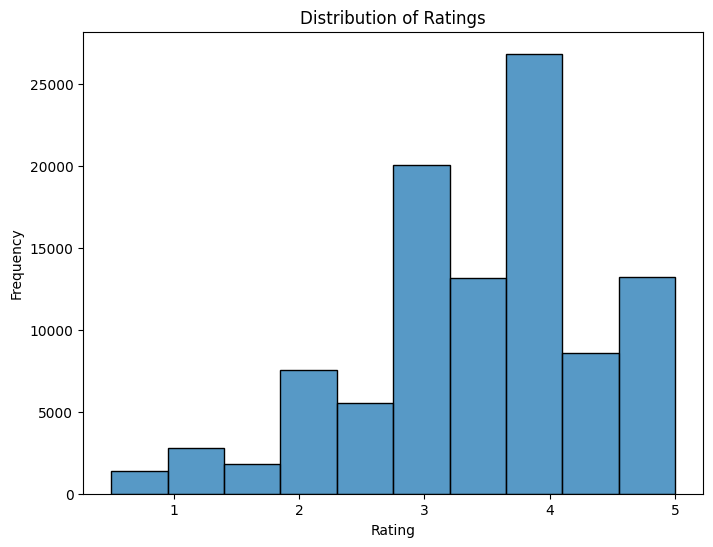

In [6]:
plt.figure(figsize=(8,6))
sns.histplot(ratings['rating'], bins = 10, kde = False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

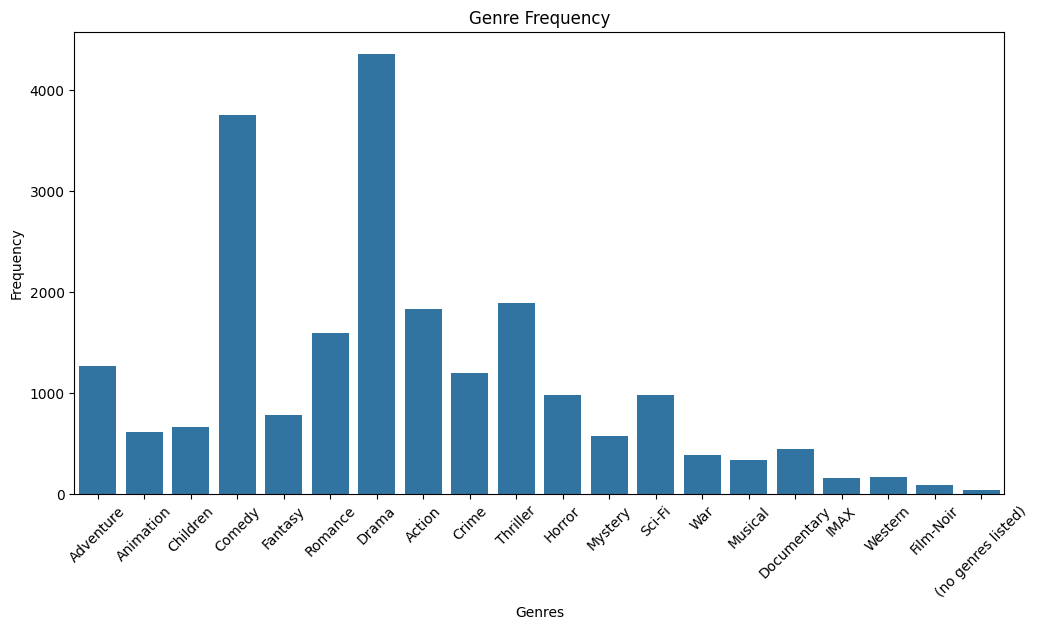

In [7]:
# Genre analysis
movies['genre_list'] = movies['genres'].str.split('|')
all_genres = [genre for genres in movies['genre_list'] for genre in genres]

from collections import Counter
genre_counts = Counter(all_genres)

plt.figure(figsize = (12,6))
sns.barplot(x = list(genre_counts.keys()), y = list(genre_counts.values()))
plt.title('Genre Frequency')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Checking for missing values in the dataset

print(ratings.isnull().sum())
print(tags.isnull().sum())
print(movies.isnull().sum())
print(links.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
movieId       0
title         0
genres        0
genre_list    0
dtype: int64
movieId    0
imdbId     0
tmdbId     8
dtype: int64


In [9]:
# Eliminating duplicates in the ratings table

ratings.drop_duplicates(inplace=True)
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,1970-01-01 00:00:00.964982703
1,1,3,4.0,1970-01-01 00:00:00.964981247
2,1,6,4.0,1970-01-01 00:00:00.964982224
3,1,47,5.0,1970-01-01 00:00:00.964983815
4,1,50,5.0,1970-01-01 00:00:00.964982931
...,...,...,...,...
100831,610,166534,4.0,1970-01-01 00:00:01.493848402
100832,610,168248,5.0,1970-01-01 00:00:01.493850091
100833,610,168250,5.0,1970-01-01 00:00:01.494273047
100834,610,168252,5.0,1970-01-01 00:00:01.493846352


In [10]:
interaction_matrix = ratings.pivot(index = 'userId', columns = 'movieId', values= 'rating').fillna(0)
print(interaction_matrix.head)

<bound method NDFrame.head of movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...         ...     ...     ...     ...     ...     ...     ...     ...   
606         2.5     0.0     0.0     0.0     0.0     0.0     2.5     0.0   
607         4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
608         2.5     2.0     2.0     0.0     0.0     0.0     0.0     0.0   
609         3.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
610         5.0     0.0     0.0     0.0     0.0     5.0     0.0     0.

In [12]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

user_ids = ratings['userId'].unique()
movie_ids = ratings['movieId'].unique()

print(user_ids)
print(movie_ids)

2025-02-03 16:22:52.432109: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 16:22:52.513390: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-03 16:22:52.569531: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738599772.628068    5422 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738599772.649892    5422 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-03 16:22:52.889766: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [13]:
# Create mappings
user_to_index = {user_id: idx for idx, user_id in enumerate(user_ids)}
movie_to_index = {movie_id: idx for idx, movie_id in enumerate(movie_ids)}

print(user_to_index)
print(movie_to_index)

{np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.int64(4): 3, np.int64(5): 4, np.int64(6): 5, np.int64(7): 6, np.int64(8): 7, np.int64(9): 8, np.int64(10): 9, np.int64(11): 10, np.int64(12): 11, np.int64(13): 12, np.int64(14): 13, np.int64(15): 14, np.int64(16): 15, np.int64(17): 16, np.int64(18): 17, np.int64(19): 18, np.int64(20): 19, np.int64(21): 20, np.int64(22): 21, np.int64(23): 22, np.int64(24): 23, np.int64(25): 24, np.int64(26): 25, np.int64(27): 26, np.int64(28): 27, np.int64(29): 28, np.int64(30): 29, np.int64(31): 30, np.int64(32): 31, np.int64(33): 32, np.int64(34): 33, np.int64(35): 34, np.int64(36): 35, np.int64(37): 36, np.int64(38): 37, np.int64(39): 38, np.int64(40): 39, np.int64(41): 40, np.int64(42): 41, np.int64(43): 42, np.int64(44): 43, np.int64(45): 44, np.int64(46): 45, np.int64(47): 46, np.int64(48): 47, np.int64(49): 48, np.int64(50): 49, np.int64(51): 50, np.int64(52): 51, np.int64(53): 52, np.int64(54): 53, np.int64(55): 54, np.int64(56): 55, np.int64(5

In [14]:
# Replace original IDs with indices
ratings['userId'] = ratings['userId'].map(user_to_index)
ratings['movieId'] = ratings['movieId'].map(movie_to_index)

In [15]:
print(ratings)

        userId  movieId  rating                     timestamp
0            0        0     4.0 1970-01-01 00:00:00.964982703
1            0        1     4.0 1970-01-01 00:00:00.964981247
2            0        2     4.0 1970-01-01 00:00:00.964982224
3            0        3     5.0 1970-01-01 00:00:00.964983815
4            0        4     5.0 1970-01-01 00:00:00.964982931
...        ...      ...     ...                           ...
100831     609     3120     4.0 1970-01-01 00:00:01.493848402
100832     609     2035     5.0 1970-01-01 00:00:01.493850091
100833     609     3121     5.0 1970-01-01 00:00:01.494273047
100834     609     1392     5.0 1970-01-01 00:00:01.493846352
100835     609     2873     3.0 1970-01-01 00:00:01.493846415

[100836 rows x 4 columns]


In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(ratings, test_size=0.2, random_state=42)

In [17]:
train_user = train['userId'].values
train_movie = train['movieId'].values
train_rating = train['rating'].values

test_user = test['userId'].values
test_movie = test['movieId'].values
test_rating = test['rating'].values

In [18]:
class CollaborativeFilteringModel(tf.keras.Model):
    def __init__(self, num_users, num_movies, embedding_dim):
        super().__init__()
        self.user_embedding = tf.keras.layers.Embedding(num_users, embedding_dim, embeddings_initializer="he_normal")
        self.movie_embedding = tf.keras.layers.Embedding(num_movies, embedding_dim, embeddings_initializer="he_normal")

    def call(self, inputs):
        user_input, movie_input = inputs
        user_vector = self.user_embedding(user_input)
        movie_vector = self.movie_embedding(movie_input)
        # Compute dot product
        dot_product = tf.reduce_sum(user_vector * movie_vector, axis=1)
        return dot_product

# Model parameters
num_users = len(user_ids)
num_movies = len(movie_ids)
embedding_dim = 50

# Instantiate the model
model = CollaborativeFilteringModel(num_users, num_movies, embedding_dim)

In [19]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    [train_user, train_movie],
    train_rating,
    validation_data=([test_user, test_movie], test_rating),
    batch_size=64,
    epochs=10
)

Epoch 1/10


2025-02-03 16:23:26.501361: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1261/1261 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 12.5912 - mae: 3.3731 - val_loss: 3.8525 - val_mae: 1.6077
Epoch 2/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.7462 - mae: 1.3104 - val_loss: 1.7771 - val_mae: 0.9853
Epoch 3/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.2507 - mae: 0.8441 - val_loss: 1.4235 - val_mae: 0.8626
Epoch 4/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.8853 - mae: 0.7171 - val_loss: 1.3050 - val_mae: 0.8180
Epoch 5/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7222 - mae: 0.6521 - val_loss: 1.2640 - val_mae: 0.8005
Epoch 6/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6204 - mae: 0.6027 - val_loss: 1.2449 - val_mae: 0.7927
Epoch 7/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5521 - mae: 0.5622 - val_loss: 1.2415 - val_mae: 0.7900
Epoch 8/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4933 - mae: 0.5271 - val_loss: 1.2450 - val_mae: 0.7921
Epoch 9/10
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/s

In [20]:
# Evaluate the model
test_loss, test_mae = model.evaluate([test_user, test_movie], test_rating)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Predict ratings for a specific user
def recommend_movies(user_id, num_recommendations=10):
    user_idx = user_to_index[user_id]
    movie_idxs = np.arange(num_movies)

    # Predict ratings for all movies
    predicted_ratings = model.predict([np.full(movie_idxs.shape, user_idx), movie_idxs])

    # Get top N recommendations
    top_movie_indices = predicted_ratings.flatten().argsort()[-num_recommendations:][::-1]
    return [(movie_id, predicted_ratings[i]) for i, movie_id in enumerate(movie_idxs[top_movie_indices])]

# Example: Get recommendations for user ID 1
recommendations = recommend_movies(1)
print("Top Recommendations for User 1:")
for movie_id, rating in recommendations:
    print(f"Movie ID {movie_id}: Predicted Rating {rating:.2f}")

631/631 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2432 - mae: 0.7934
Test Loss: 1.2528640031814575, Test MAE: 0.7946751117706299
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
Top Recommendations for User 1:
Movie ID 5866: Predicted Rating 4.10
Movie ID 7281: Predicted Rating 4.16
Movie ID 2256: Predicted Rating 4.85
Movie ID 5559: Predicted Rating 4.51
Movie ID 6951: Predicted Rating 4.92
Movie ID 8110: Predicted Rating 4.27
Movie ID 3161: Predicted Rating 4.40
Movie ID 7399: Predicted Rating 4.19
Movie ID 4308: Predicted Rating 3.66
Movie ID 3603: Predicted Rating 4.43


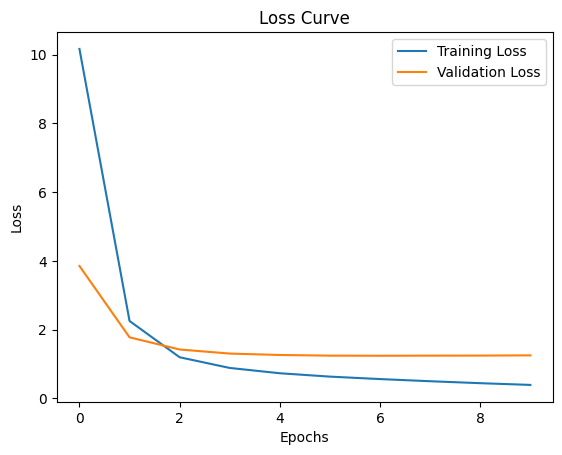

In [21]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
